## Hi, Akshit here!
# Credits for this goes to Sujay!

scored 9/10 in phase A.

Submit Your Project here: https://docs.google.com/forms/d/e/1FAIpQLSdOaljgV-INdbKrPotV9OMUKV01QVaFEfcnr5dAxBZqM4x37g/viewform

# Pre-requisites for Project:

Go through this video for first 2 hrs, it basically covers the wsl, git, github, docker related stuff.
```
https://www.youtube.com/watch?v=jXj6bqy4R4c&list=PL_h5u1jMeBCl1BquBhgunA4t08XAxsA-C&index=17
```

```
The above video contains:
1. Creating a new public git repo.
2. Adding MIT lincense to the repo.
3. Commiting and pushing the code.
4. Creating a docker file that builds our application.
5. Publishing our docker image publicly to docker hub.
```

## A1 Task: Install uv and Run datagen.py
What this task does:
- Installs uv (if not installed).
- Runs a script from a URL (datagen.py) with your email as an argument.
- Generates data files required for later tasks.

-----
## Task A2: Format Markdown Using Prettier
What this task does:
- Takes a Markdown file (/data/format.md).
- Formats it in-place using prettier@3.4.2.
- Uses npx (Node.js package runner) to execute Prettier.
---
## Task A3: Count the Number of Wednesdays in /data/dates.txt

What this task does:
- Reads the file /data/dates.txt, which contains a list of dates (one per line).
- Counts how many dates are Wednesdays.
- Writes the result to /data/dates-wednesdays.txt (only the number).

---
## Task A4: Sort Contacts in /data/contacts.json
What this task does:

- Reads the file /data/contacts.json, which contains a list of contacts.
- Sorts the contacts by last_name, then first_name.
- Writes the sorted list to /data/contacts-sorted.json.
---
## Task A5: Extract First Lines from the 10 Most Recent .log Files
What this task does:

- Finds all .log files inside /data/logs/.
- Sorts them by modification time (newest first).
- Extracts the first line from the 10 most recent log files.
- Writes the result to /data/logs-recent.txt (one line per log file).
---
## Task A6: Extract Titles from Markdown (.md) Files
What this task does:

- Scans all Markdown (.md) files in /data/docs/.
- Extracts the first H1 title (i.e., a line starting with # ).
- Creates an index file (/data/docs/index.json) that maps filenames to their titles.
---
## Task A7: Extract the Sender’s Email from /data/email.txt Using LLM
What this task does:

- Reads the email content from /data/email.txt.
- Uses GPT-4o-Mini (via AI Proxy API) to extract the sender’s email.
- Writes the extracted email to /data/email-sender.txt.
---
##  Task A8: Extract a Credit Card Number from an Image Using LLM
What this task does:

- Reads the image file /data/credit-card.png.
- Uses GPT-4o-Mini (via AI Proxy API) to extract the credit card number.
- Writes the extracted number (without spaces) to /data/credit-card.txt.
---
##  Task A9: Find the Most Similar Pair of Comments Using Embeddings
What this task does:

- Reads /data/comments.txt, which contains a list of comments (one per line).
- Uses text embeddings (via AI Proxy API, text-embedding-3-small) to find the most similar pair.
- Writes the two most similar comments to /data/comments-similar.txt (one per line).
---
## Task A10: Calculate Total Sales for "Gold" Tickets in an SQLite Database
What this task does:

- Reads the SQLite database file /data/ticket-sales.db.
- Queries the tickets table to sum the total units * price for "Gold" tickets.
- Writes the result to /data/ticket-sales-gold.txt.

---
---
---
# PROCESS
1. Create a folder and add below files in it. (app.py, dockerfile, evaluate.py, datagen.py, tasksA.py, tasksB.py)
2. Create a file called .env and add
```
AIPROXY_TOKEN= (your token without quotes, paste it here as it is)
```
3. Open terminal and type: ``uv run app.py``
4. Open new terminal simultaneously and type: ``uv run evaluate.py --email=xxxxxxxxx@ds.study.iitm.ac.in --log-level=INFO``
5. Make sure you have uv and npx installed.

# app.py

In [ ]:
# app.py
# /// script
# dependencies = [
#   "requests",
#   "fastapi",
#   "uvicorn",
#   "python-dateutil",
#   "pandas",
#   "db-sqlite3",
#   "scipy",
#   "pybase64",
#   "python-dotenv",
#   "httpx",
#   "markdown",
#   "duckdb"
# ]
# ///

from fastapi import FastAPI, HTTPException, Query
from fastapi.responses import PlainTextResponse, JSONResponse
from fastapi.middleware.cors import CORSMiddleware
from tasksA import *
from tasksB import *
import requests
from dotenv import load_dotenv
import os
import re
import httpx
import json

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["GET", "POST"],
    allow_headers=["*"],
)


app = FastAPI()
load_dotenv()

# @app.get('/ask')
# def ask(prompt: str):
#     """ Prompt Gemini to generate a response based on the given prompt. """
#     gemini_api_key = os.getenv('gemini_api_key')
#     if not gemini_api_key:
#         return JSONResponse(content={"error": "GEMINI_API_KEY not set"}, status_code=500)

#     # Read the contents of tasks.py
#     with open('tasks.py', 'r') as file:
#         tasks_content = file.read()

#     # Prepare the request data
#     data = {
#         "contents": [{
#             "parts": [
#                 {"text": f"Find the task function from here for the below prompt:\n{tasks_content}\n\nPrompt: {prompt}\n\n respond with the function_name and function_parameters with parameters in json format"},
#             ]
#         }]
#     }

#     url = f"https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash:generateContent?key={gemini_api_key}"
#     headers = {
#         "Content-Type": "application/json"
#     }

#     response = requests.post(url, json=data, headers=headers)

#     if response.status_code == 200:
#         text_reponse = response.json()["candidates"][0]["content"]["parts"][0]["text"]
#         match = re.search(r'```json\n(.*?)\n```', text_reponse, re.DOTALL)
#         text_reponse = match.group(1).strip() if match else text_reponse
#         return json.loads(text_reponse)
#         # return JSONResponse(content=response.json(), status_code=200)
#     else:
#         return JSONResponse(content={"error": "Failed to get response", "details": response.text}, status_code=response.status_code)

@app.get("/ask")
def ask(prompt: str):
    result = get_completions(prompt)
    return result

openai_api_chat  = "http://aiproxy.sanand.workers.dev/openai/v1/chat/completions" # for testing
openai_api_key = os.getenv("AIPROXY_TOKEN")

headers = {
    "Authorization": f"Bearer {openai_api_key}",
    "Content-Type": "application/json",
}

function_definitions_llm = [
    {
        "name": "A1",
        "description": "Run a Python script from a given URL, passing an email as the argument.",
        "parameters": {
            "type": "object",
            "properties": {
                # "filename": {"type": "string", "pattern": r"https?://.*\.py"},
                # "targetfile": {"type": "string", "pattern": r".*/(.*\.py)"},
                "email": {"type": "string", "pattern": r"[\w\.-]+@[\w\.-]+\.\w+"}
            },
            "required": ["filename", "targetfile", "email"]
        }
    },
    {
        "name": "A2",
        "description": "Format a markdown file using a specified version of Prettier.",
        "parameters": {
            "type": "object",
            "properties": {
                "prettier_version": {"type": "string", "pattern": r"prettier@\d+\.\d+\.\d+"},
                "filename": {"type": "string", "pattern": r".*/(.*\.md)"}
            },
            "required": ["prettier_version", "filename"]
        }
    },
    {
        "name": "A3",
        "description": "Count the number of occurrences of a specific weekday in a date file.",
        "parameters": {
            "type": "object",
            "properties": {
                "filename": {"type": "string", "pattern": r"/data/.*dates.*\.txt"},
                "targetfile": {"type": "string", "pattern": r"/data/.*/(.*\.txt)"},
                "weekday": {"type": "integer", "pattern": r"(Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday)"}
            },
            "required": ["filename", "targetfile", "weekday"]
        }
    },
    {
        "name": "A4",
        "description": "Sort a JSON contacts file and save the sorted version to a target file.",
        "parameters": {
            "type": "object",
            "properties": {
                "filename": {
                    "type": "string",
                    "pattern": r".*/(.*\.json)",
                },
                "targetfile": {
                    "type": "string",
                    "pattern": r".*/(.*\.json)",
                }
            },
            "required": ["filename", "targetfile"]
        }
    },
    {
        "name": "A5",
        "description": "Retrieve the most recent log files from a directory and save their content to an output file.",
        "parameters": {
            "type": "object",
            "properties": {
                "log_dir_path": {
                    "type": "string",
                    "pattern": r".*/logs",
                    "default": "/data/logs"
                },
                "output_file_path": {
                    "type": "string",
                    "pattern": r".*/(.*\.txt)",
                    "default": "/data/logs-recent.txt"
                },
                "num_files": {
                    "type": "integer",
                    "minimum": 1,
                    "default": 10
                }
            },
            "required": ["log_dir_path", "output_file_path", "num_files"]
        }
    },
    {
        "name": "A6",
        "description": "Generate an index of documents from a directory and save it as a JSON file.",
        "parameters": {
            "type": "object",
            "properties": {
                "doc_dir_path": {
                    "type": "string",
                    "pattern": r".*/docs",
                    "default": "/data/docs"
                },
                "output_file_path": {
                    "type": "string",
                    "pattern": r".*/(.*\.json)",
                    "default": "/data/docs/index.json"
                }
            },
            "required": ["doc_dir_path", "output_file_path"]
        }
    },
    {
        "name": "A7",
        "description": "Extract the sender's email address from a text file and save it to an output file.",
        "parameters": {
            "type": "object",
            "properties": {
                "filename": {
                    "type": "string",
                    "pattern": r".*/(.*\.txt)",
                    "default": "/data/email.txt"
                },
                "output_file": {
                    "type": "string",
                    "pattern": r".*/(.*\.txt)",
                    "default": "/data/email-sender.txt"
                }
            },
            "required": ["filename", "output_file"]
        }
    },
    {
        "name": "A8",
        "description": "Generate an image representation of credit card details from a text file.",
        "parameters": {
            "type": "object",
            "properties": {
                "filename": {
                    "type": "string",
                    "pattern": r".*/(.*\.txt)",
                    "default": "/data/credit-card.txt"
                },
                "image_path": {
                    "type": "string",
                    "pattern": r".*/(.*\.png)",
                    "default": "/data/credit-card.png"
                }
            },
            "required": ["filename", "image_path"]
        }
    },
    {
        "name": "A9",
        "description": "Find similar comments from a text file and save them to an output file.",
        "parameters": {
            "type": "object",
            "properties": {
                "filename": {
                    "type": "string",
                    "pattern": r".*/(.*\.txt)",
                    "default": "/data/comments.txt"
                },
                "output_filename": {
                    "type": "string",
                    "pattern": r".*/(.*\.txt)",
                    "default": "/data/comments-similar.txt"
                }
            },
            "required": ["filename", "output_filename"]
        }
    },
    {
        "name": "A10",
        "description": "Identify high-value (gold) ticket sales from a database and save them to a text file.",
        "parameters": {
            "type": "object",
            "properties": {
                "filename": {
                    "type": "string",
                    "pattern": r".*/(.*\.db)",
                    "default": "/data/ticket-sales.db"
                },
                "output_filename": {
                    "type": "string",
                    "pattern": r".*/(.*\.txt)",
                    "default": "/data/ticket-sales-gold.txt"
                },
                "query": {
                    "type": "string",
                    "pattern": "SELECT SUM(units * price) FROM tickets WHERE type = 'Gold'"
                }
            },
            "required": ["filename", "output_filename", "query"]
        }
    },
    {
        "name": "B12",
        "description": "Check if filepath starts with /data",
        "parameters": {
            "type": "object",
            "properties": {
                "filepath": {
                    "type": "string",
                    "pattern": r"^/data/.*",
                    # "description": "Filepath must start with /data to ensure secure access."
                }
            },
            "required": ["filepath"]
        }
    },
    {
        "name": "B3",
        "description": "Download content from a URL and save it to the specified path.",
        "parameters": {
            "type": "object",
            "properties": {
                "url": {
                    "type": "string",
                    "pattern": r"https?://.*",
                    "description": "URL to download content from."
                },
                "save_path": {
                    "type": "string",
                    "pattern": r".*/.*",
                    "description": "Path to save the downloaded content."
                }
            },
            "required": ["url", "save_path"]
        }
    },
    {
        "name": "B5",
        "description": "Execute a SQL query on a specified database file and save the result to an output file.",
        "parameters": {
            "type": "object",
            "properties": {
                "db_path": {
                    "type": "string",
                    "pattern": r".*/(.*\.db)",
                    "description": "Path to the SQLite database file."
                },
                "query": {
                    "type": "string",
                    "description": "SQL query to be executed on the database."
                },
                "output_filename": {
                    "type": "string",
                    "pattern": r".*/(.*\.txt)",
                    "description": "Path to the file where the query result will be saved."
                }
            },
            "required": ["db_path", "query", "output_filename"]
        }
    },
    {
        "name": "B6",
        "description": "Fetch content from a URL and save it to the specified output file.",
        "parameters": {
            "type": "object",
            "properties": {
                "url": {
                    "type": "string",
                    "pattern": r"https?://.*",
                    "description": "URL to fetch content from."
                },
                "output_filename": {
                    "type": "string",
                    "pattern": r".*/.*",
                    "description": "Path to the file where the content will be saved."
                }
            },
            "required": ["url", "output_filename"]
        }
    },
    {
        "name": "B7",
        "description": "Process an image by optionally resizing it and saving the result to an output path.",
        "parameters": {
            "type": "object",
            "properties": {
                "image_path": {
                    "type": "string",
                    "pattern": r".*/(.*\.(jpg|jpeg|png|gif|bmp))",
                    "description": "Path to the input image file."
                },
                "output_path": {
                    "type": "string",
                    "pattern": r".*/.*",
                    "description": "Path to save the processed image."
                },
                "resize": {
                    "type": "array",
                    "items": {
                        "type": "integer",
                        "minimum": 1
                    },
                    "minItems": 2,
                    "maxItems": 2,
                    "description": "Optional. Resize dimensions as [width, height]."
                }
            },
            "required": ["image_path", "output_path"]
        }
    },
    {
        "name": "B9",
        "description": "Convert a Markdown file to another format and save the result to the specified output path.",
        "parameters": {
            "type": "object",
            "properties": {
                "md_path": {
                    "type": "string",
                    "pattern": r".*/(.*\.md)",
                    "description": "Path to the Markdown file to be converted."
                },
                "output_path": {
                    "type": "string",
                    "pattern": r".*/.*",
                    "description": "Path where the converted file will be saved."
                }
            },
            "required": ["md_path", "output_path"]
        }
    }

]

def get_completions(prompt: str):
    with httpx.Client(timeout=20) as client:
        response = client.post(
            f"{openai_api_chat}",
            headers=headers,
            json=
                {
                    "model": "gpt-4o-mini",
                    "messages": [
                                    {"role": "system", "content": "You are a function classifier that extracts structured parameters from queries."},
                                    {"role": "user", "content": prompt}
                                ],
                    "tools": [
                                {
                                    "type": "function",
                                    "function": function
                                } for function in function_definitions_llm
                            ],
                    "tool_choice": "auto"
                },
        )
    # return response.json()
    print(response.json()["choices"][0]["message"]["tool_calls"][0]["function"])
    return response.json()["choices"][0]["message"]["tool_calls"][0]["function"]


# Placeholder for task execution
@app.post("/run")
async def run_task(task: str):
    try:
        # Placeholder logic for executing tasks
        # Replace with actual logic to parse task and execute steps
        # Example: Execute task and return success or error based on result
        # llm_response = function_calling(tast), function_name = A1
        response = get_completions(task)
        print(response)
        task_code = response['name']
        arguments = response['arguments']

        if "A1"== task_code:
            A1(**json.loads(arguments))
        if "A2"== task_code:
            A2(**json.loads(arguments))
        if "A3"== task_code:
            A3(**json.loads(arguments))
        if "A4"== task_code:
            A4(**json.loads(arguments))
        if "A5"== task_code:
            A5(**json.loads(arguments))
        if "A6"== task_code:
            A6(**json.loads(arguments))
        if "A7"== task_code:
            A7(**json.loads(arguments))
        if "A8"== task_code:
            A8(**json.loads(arguments))
        if "A9"== task_code:
            A9(**json.loads(arguments))
        if "A10"== task_code:
            A10(**json.loads(arguments))


        if "B12"== task_code:
            B12(**json.loads(arguments))
        if "B3" == task_code:
            B3(**json.loads(arguments))
        if "B5" == task_code:
            B5(**json.loads(arguments))
        if "B6" == task_code:
            B6(**json.loads(arguments))
        if "B7" == task_code:
            B7(**json.loads(arguments))
        if "B9" == task_code:
            B9(**json.loads(arguments))
        return {"message": f"{task_code} Task '{task}' executed successfully"}
    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

# Placeholder for file reading
@app.get("/read", response_class=PlainTextResponse)
async def read_file(path: str = Query(..., description="File path to read")):
    try:
        with open(path, "r") as file:
            return file.read()
    except FileNotFoundError:
        raise HTTPException(status_code=404, detail="File not found")
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)


# tasksA.py
(change your mail id)

In [ ]:
import sqlite3
import subprocess
from dateutil.parser import parse
from datetime import datetime
import json
from pathlib import Path
import os
import requests
from scipy.spatial.distance import cosine
from dotenv import load_dotenv

load_dotenv()

AIPROXY_TOKEN = os.getenv('AIPROXY_TOKEN')


def A1(email="xxxxxxxxx@ds.study.iitm.ac.in"):
    try:
        process = subprocess.Popen(
            ["uv", "run", "https://raw.githubusercontent.com/sanand0/tools-in-data-science-public/tds-2025-01/project-1/datagen.py", email],
            stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True
        )
        stdout, stderr = process.communicate()
        if process.returncode != 0:
            raise HTTPException(status_code=500, detail=f"Error: {stderr}")
        return stdout
    except subprocess.CalledProcessError as e:
        raise HTTPException(status_code=500, detail=f"Error: {e.stderr}")
# A1()
def A2(prettier_version="prettier@3.4.2", filename="/data/format.md"):
    command = [r"C:\Program Files\nodejs\npx.cmd", prettier_version, "--write", filename]
    try:
        subprocess.run(command, check=True)
        print("Prettier executed successfully.")
    except subprocess.CalledProcessError as e:
        print(f"An error occurred: {e}")

def A3(filename='/data/dates.txt', targetfile='/data/dates-wednesdays.txt', weekday=2):
    input_file = filename
    output_file = targetfile
    weekday = weekday
    weekday_count = 0

    with open(input_file, 'r') as file:
        weekday_count = sum(1 for date in file if parse(date).weekday() == int(weekday)-1)


    with open(output_file, 'w') as file:
        file.write(str(weekday_count))

def A4(filename="/data/contacts.json", targetfile="/data/contacts-sorted.json"):
    # Load the contacts from the JSON file
    with open(filename, 'r') as file:
        contacts = json.load(file)

    # Sort the contacts by last_name and then by first_name
    sorted_contacts = sorted(contacts, key=lambda x: (x['last_name'], x['first_name']))

    # Write the sorted contacts to the new JSON file
    with open(targetfile, 'w') as file:
        json.dump(sorted_contacts, file, indent=4)

def A5(log_dir_path='/data/logs', output_file_path='/data/logs-recent.txt', num_files=10):
    log_dir = Path(log_dir_path)
    output_file = Path(output_file_path)

    # Get list of .log files sorted by modification time (most recent first)
    log_files = sorted(log_dir.glob('*.log'), key=os.path.getmtime, reverse=True)[:num_files]

    # Read first line of each file and write to the output file
    with output_file.open('w') as f_out:
        for log_file in log_files:
            with log_file.open('r') as f_in:
                first_line = f_in.readline().strip()
                f_out.write(f"{first_line}\n")

def A6(doc_dir_path='/data/docs', output_file_path='/data/docs/index.json'):
    docs_dir = doc_dir_path
    output_file = output_file_path
    index_data = {}

    # Walk through all files in the docs directory
    for root, _, files in os.walk(docs_dir):
        for file in files:
            if file.endswith('.md'):
                # print(file)
                file_path = os.path.join(root, file)
                # Read the file and find the first occurrence of an H1
                with open(file_path, 'r', encoding='utf-8') as f:
                    for line in f:
                        if line.startswith('# '):
                            # Extract the title text after '# '
                            title = line[2:].strip()
                            # Get the relative path without the prefix
                            relative_path = os.path.relpath(file_path, docs_dir).replace('\\', '/')
                            index_data[relative_path] = title
                            break  # Stop after the first H1
    # Write the index data to index.json
    # print(index_data)
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(index_data, f, indent=4)

def A7(filename='/data/email.txt', output_file='/data/email-sender.txt'):
    # Read the content of the email
    with open(filename, 'r') as file:
        email_content = file.readlines()

    sender_email = "sujay@gmail.com"
    for line in email_content:
        if "From" == line[:4]:
            sender_email = (line.strip().split(" ")[-1]).replace("<", "").replace(">", "")
            break

    # Get the extracted email address

    # Write the email address to the output file
    with open(output_file, 'w') as file:
        file.write(sender_email)

import base64
def png_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        base64_string = base64.b64encode(image_file.read()).decode('utf-8')
    return base64_string
# def A8():
#     input_image = "data/credit_card.png"
#     output_file = "data/credit-card.txt"

#     # Step 1: Extract text using OCR
#     try:
#         image = Image.open(input_image)
#         extracted_text = pytesseract.image_to_string(image)
#         print(f"Extracted text:\n{extracted_text}")
#     except Exception as e:
#         print(f"❌ Error reading or processing {input_image}: {e}")
#         return

#     # Step 2: Pass the extracted text to the LLM to validate and extract card number
#     prompt = f"""Extract the credit card number from the following text. Respond with only the card number, without spaces:

#     {extracted_text}
#     """
#     try:
#         card_number = ask_llm(prompt).strip()
#         print(f"Card number extracted by LLM: {card_number}")
#     except Exception as e:
#         print(f"❌ Error processing with LLM: {e}")
#         return

#     # Step 3: Save the extracted card number to a text file
#     try:
#         with open(output_file, "w", encoding="utf-8") as file:
#             file.write(card_number + "\n")
#         print(f"✅ Credit card number saved to: {output_file}")
#     except Exception as e:
#         print(f"❌ Error writing {output_file}: {e}")

def A8(filename='/data/credit_card.txt', image_path='/data/credit_card.png'):
    # Construct the request body for the AIProxy call
    body = {
        "model": "gpt-4o-mini",
        "messages": [
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "There is 8 or more digit number is there in this image, with space after every 4 digit, only extract the those digit number without spaces and return just the number without any other characters"
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/png;base64,{png_to_base64(image_path)}"
                        }
                    }
                ]
            }
        ]
    }

    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {AIPROXY_TOKEN}"
    }

    # Make the request to the AIProxy service
    response = requests.post("http://aiproxy.sanand.workers.dev/openai/v1/chat/completions",
                             headers=headers, data=json.dumps(body))
    # response.raise_for_status()

    # Extract the credit card number from the response
    result = response.json()
    # print(result); return None
    card_number = result['choices'][0]['message']['content'].replace(" ", "")

    # Write the extracted card number to the output file
    with open(filename, 'w') as file:
        file.write(card_number)
# A8()



def get_embedding(text):
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {AIPROXY_TOKEN}"
    }
    data = {
        "model": "text-embedding-3-small",
        "input": [text]
    }
    response = requests.post("http://aiproxy.sanand.workers.dev/openai/v1/embeddings", headers=headers, data=json.dumps(data))
    response.raise_for_status()
    return response.json()["data"][0]["embedding"]

def A9(filename='/data/comments.txt', output_filename='/data/comments-similar.txt'):
    # Read comments
    with open(filename, 'r') as f:
        comments = [line.strip() for line in f.readlines()]

    # Get embeddings for all comments
    embeddings = [get_embedding(comment) for comment in comments]

    # Find the most similar pair
    min_distance = float('inf')
    most_similar = (None, None)

    for i in range(len(comments)):
        for j in range(i + 1, len(comments)):
            distance = cosine(embeddings[i], embeddings[j])
            if distance < min_distance:
                min_distance = distance
                most_similar = (comments[i], comments[j])

    # Write the most similar pair to file
    with open(output_filename, 'w') as f:
        f.write(most_similar[0] + '\n')
        f.write(most_similar[1] + '\n')

def A10(filename='/data/ticket-sales.db', output_filename='/data/ticket-sales-gold.txt', query="SELECT SUM(units * price) FROM tickets WHERE type = 'Gold'"):
    # Connect to the SQLite database
    conn = sqlite3.connect(filename)
    cursor = conn.cursor()

    # Calculate the total sales for the "Gold" ticket type
    cursor.execute(query)
    total_sales = cursor.fetchone()[0]

    # If there are no sales, set total_sales to 0
    total_sales = total_sales if total_sales else 0

    # Write the total sales to the file
    with open(output_filename, 'w') as file:
        file.write(str(total_sales))

    # Close the database connection
    conn.close()


# tasksB.py

In [ ]:
# Phase B: LLM-based Automation Agent for DataWorks Solutions

# B1 & B2: Security Checks
import os

def B12(filepath):
    if filepath.startswith('/data'):
        # raise PermissionError("Access outside /data is not allowed.")
        # print("Access outside /data is not allowed.")
        return True
    else:
        return False

# B3: Fetch Data from an API
def B3(url, save_path):
    if not B12(save_path):
        return None
    import requests
    response = requests.get(url)
    with open(save_path, 'w') as file:
        file.write(response.text)

# B4: Clone a Git Repo and Make a Commit
# def clone_git_repo(repo_url, commit_message):
#     import subprocess
#     subprocess.run(["git", "clone", repo_url, "/data/repo"])
#     subprocess.run(["git", "-C", "/data/repo", "commit", "-m", commit_message])

# B5: Run SQL Query
def B5(db_path, query, output_filename):
    if not B12(db_path):
        return None
    import sqlite3, duckdb
    conn = sqlite3.connect(db_path) if db_path.endswith('.db') else duckdb.connect(db_path)
    cur = conn.cursor()
    cur.execute(query)
    result = cur.fetchall()
    conn.close()
    with open(output_filename, 'w') as file:
        file.write(str(result))
    return result

# B6: Web Scraping
def B6(url, output_filename):
    import requests
    result = requests.get(url).text
    with open(output_filename, 'w') as file:
        file.write(str(result))

# B7: Image Processing
def B7(image_path, output_path, resize=None):
    from PIL import Image
    if not B12(image_path):
        return None
    if not B12(output_path):
        return None
    img = Image.open(image_path)
    if resize:
        img = img.resize(resize)
    img.save(output_path)

# B8: Audio Transcription
# def B8(audio_path):
#     import openai
#     if not B12(audio_path):
#         return None
#     with open(audio_path, 'rb') as audio_file:
#         return openai.Audio.transcribe("whisper-1", audio_file)

# B9: Markdown to HTML Conversion
def B9(md_path, output_path):
    import markdown
    if not B12(md_path):
        return None
    if not B12(output_path):
        return None
    with open(md_path, 'r') as file:
        html = markdown.markdown(file.read())
    with open(output_path, 'w') as file:
        file.write(html)

# B10: API Endpoint for CSV Filtering
# from flask import Flask, request, jsonify
# app = Flask(__name__)
# @app.route('/filter_csv', methods=['POST'])
# def filter_csv():
#     import pandas as pd
#     data = request.json
#     csv_path, filter_column, filter_value = data['csv_path'], data['filter_column'], data['filter_value']
#     B12(csv_path)
#     df = pd.read_csv(csv_path)
#     filtered = df[df[filter_column] == filter_value]
#     return jsonify(filtered.to_dict(orient='records'))

# datagen.py

In [ ]:
# DISCLAIMER: THIS SCRIPT WILL CHANGE BEFORE THE EVALUATION. TREAT THIS AS A GUIDE.

# Usage: uv run datagen.py <email>

# /// script
# requires-python = ">=3.13"
# dependencies = [
#     "faker",
#     "pillow",
# ]
# ///

import datetime
import hashlib
import json
import os
import random
import sqlite3
import time
from PIL import Image, ImageDraw, ImageFont
from faker import Faker

config = {"root": "/data"}


def num(str):
    return int(hashlib.sha256(str.encode()).hexdigest(), 16) % (2**32)


def write_file(path, content):
    with open(os.path.join(config["root"], path), "w", encoding="utf-8") as f:
        f.write(content)


def get_markdown(email):
    return f"""#Unformatted Markdown

This  is a sample paragraph with extra  spaces and trailing whitespace.
-   First item
-    Second item
+Third item
    *    Fourth item

```py
print("{email}")

```
"""


def a2_format_markdown():
    """Generate a poorly formatted markdown file at format.md.

    This is a tricky file because formatting it _twice_ changes the format!
    """
    write_file("format.md", get_markdown(config["email"]))


def get_dates(email):
    random.seed(f"{email}:a3", version=2)
    start_date = datetime.datetime(2000, 1, 1)
    end_date = datetime.datetime(2024, 12, 31)
    formats = [
        "%Y-%m-%d",  # 2024-03-14
        "%d-%b-%Y",  # 14-Mar-2024
        "%b %d, %Y",  # Mar 14, 2024
        "%Y/%m/%d %H:%M:%S",  # 2024/03/14 15:30:45
    ]
    timestamps = random.sample(range(int(start_date.timestamp()), int(end_date.timestamp())), 1000)
    return [
        datetime.datetime.fromtimestamp(ts).strftime(random.choice(formats)) for ts in timestamps
    ]


def a3_dates():
    """Save 1,000 random non-unique dates between 2000-01-01 and 2024-12-31 at dates.txt

    Generates dates in various unambiguous formats:
    - ISO 8601: yyyy-mm-dd
    - dd-MMM-yyyy
    - MMM dd, yyyy
    - yyyy/mm/dd HH:MM:SS
    """
    dates = get_dates(config["email"])
    write_file("dates.txt", "\n".join(dates))


def get_contacts(email):
    fake = Faker()
    fake.seed_instance(num(f"{email}:a4"))
    return [
        {"first_name": fake.first_name(), "last_name": fake.last_name(), "email": fake.email()}
        for _ in range(100)
    ]


def a4_contacts():
    """Generate a JSON with 100 contacts with random first_name, last_name, and email"""
    contacts = get_contacts(config["email"])
    write_file("contacts.json", json.dumps(contacts))


def get_logs(email):
    files = []
    random.seed(f"{email}:a5", version=2)
    fake = Faker()
    fake.seed_instance(num(f"{email}:a5"))
    for i in range(50):
        text = "\n".join([fake.text() for _ in range(10)])
        age = random.randint(1, 24 * 60 * 60 * 365)
        files.append((age, text))
    return files


def a5_logs():
    """Generate 50 log files with 10 lines each of random content at logs/"""
    email = config["email"]
    os.makedirs(os.path.join(config["root"], "logs"), exist_ok=True)
    now = time.time()
    for i, (age, text) in enumerate(get_logs(email)):
        write_file(f"logs/log-{i}.log", text)
        os.utime(os.path.join(config["root"], f"logs/log-{i}.log"), (now - age, now - age))


def get_docs(email):
    files = []
    random.seed(f"{email}:a6", version=2)
    fake = Faker()
    fake.seed_instance(num(f"{email}:a6"))
    for dir in fake.words(10):
        for file in fake.words(10):
            prefix = "\n".join([fake.text() for _ in range(random.randint(0, 10))])
            heading = f"# {fake.sentence()}"
            suffix = "\n".join([fake.text() for _ in range(random.randint(0, 10))])
            text = "\n".join([prefix, heading, suffix])
            files.append((dir, file, text))
    return files


def a6_docs():
    """Generate 10 Markdown files each under 10 random subdirectories with random content."""
    email = config["email"]
    docs = get_docs(email)
    os.makedirs(os.path.join(config["root"], "docs"), exist_ok=True)
    for dir, file, text in docs:
        dirname = os.path.join(config["root"], "docs", dir)
        os.makedirs(dirname, exist_ok=True)
        write_file(os.path.join(dirname, f"{file}.md"), text)


def get_email(email):
    fake = Faker()
    fake.seed_instance(num(f"{email}:a7"))
    email = {
        "recipient": fake.email(),
        "from_name": fake.name(),
        "from_email": fake.email(),
        "date": fake.date_time().strftime("%a, %d %b %Y %H:%M:%S +0000"),
        "subject": fake.sentence(),
        "recipient_name": fake.name(),
        "cc_1_name": fake.name(),
        "cc_1_email": fake.email(),
        "cc_2_name": fake.name(),
        "cc_2_email": fake.email(),
        "cc_3_name": fake.name(),
        "cc_3_email": fake.email(),
        "body": fake.text(),
    }
    return email


def a7_email():
    """Generate an email file at email.txt"""
    data = get_email(config["email"])
    write_file(
        "email.txt",
        f"""Delivered-To: {data["recipient"]}
MIME-Version: 1.0
From: "{data["from_name"]}" <{data["from_email"]}>
Date: {data["date"]}
Subject: {data["subject"]}
To: "{data["recipient_name"]}" <{data["recipient"]}>
Cc: "{data["cc_1_name"]}" <{data["cc_1_email"]}>, "{data["cc_2_name"]}" <{data["cc_2_email"]}>, "{data["cc_3_name"]}" <{data["cc_3_email"]}>
Content-Type: multipart/alternative; boundary="00000000000091a0ba062bcdefca"

--00000000000091a0ba062bcdefca
Content-Type: text/plain; charset="UTF-8"
Content-Transfer-Encoding: quoted-printable

{data["body"]}

--00000000000091a0ba062bcdefca--
""",
    )


def get_credit_card(email):
    fake = Faker()
    fake.seed_instance(num(f"{email}:a8"))
    return {
        "number": fake.credit_card_number(),
        "expiry": fake.credit_card_expire(),
        "security_code": fake.credit_card_security_code(),
        "name": fake.name().upper(),
    }


def a8_credit_card_image():
    """Generate a credit card image at credit_card.png that mimics a real credit card layout"""
    data = get_credit_card(config["email"])

    # Create image with credit card proportions (3.375" x 2.125" at 300 DPI)
    WIDTH, HEIGHT = 1012, 638
    image = Image.new("RGB", (WIDTH, HEIGHT), (25, 68, 141))  # Deep blue background
    draw = ImageDraw.Draw(image)

    # Use a larger font for credit card number, simplifying OCR
    large_font = ImageFont.load_default()
    large_font.size = 60

    # Format credit card number with spaces
    cc_number = " ".join([data["number"][i : i + 4] for i in range(0, 16, 4)])
    # Position elements
    draw.text((50, 250), cc_number, fill=(255, 255, 255), font=large_font)
    draw.text((50, 400), "VALID\nTHRU", fill=(255, 255, 255))
    draw.text((50, 480), data["expiry"], fill=(255, 255, 255))
    draw.text((250, 480), data["security_code"], fill=(255, 255, 255))
    draw.text((50, 550), data["name"], fill=(255, 255, 255))

    image.save(os.path.join(config["root"], "credit_card.png"))


def get_comments(email):
    fake = Faker()
    fake.seed_instance(num(f"{email}:a9"))
    return [fake.paragraph() for _ in range(100)]


def a9_comments():
    """Generate a comments.txt file with 100 random comments"""
    write_file("comments.txt", "\n".join(get_comments(config["email"])))


def get_tickets(email):
    random.seed(f"{email}:a10", version=2)
    ticket_types = ["Gold", "Silver", "Bronze"]
    return [
        (random.choice(ticket_types), random.randint(1, 10), round(random.uniform(50, 150), 2))
        for _ in range(1000)
    ]


def a10_ticket_sales():
    """Generate ticket-sales.db with a tickets(type, units, price) table. 1 row per ticket"""
    target = os.path.join(config["root"], "ticket-sales.db")
    if os.path.exists(target):
        os.remove(target)
    conn = sqlite3.connect(target)
    cursor = conn.cursor()
    cursor.execute(
        """
        CREATE TABLE IF NOT EXISTS tickets (
            type TEXT NOT NULL,
            units INTEGER NOT NULL,
            price DECIMAL(10,2) NOT NULL
        )
    """
    )
    cursor.executemany("INSERT INTO tickets VALUES (?, ?, ?)", get_tickets(config["email"]))
    conn.commit()
    conn.close()


if __name__ == "__main__":
    import argparse

    parser = argparse.ArgumentParser()
    parser.add_argument("email")
    parser.add_argument("--root", default="/data")
    args = parser.parse_args()
    config["email"] = args.email
    config["root"] = os.path.abspath(args.root)

    os.makedirs(config["root"], exist_ok=True)

    print("DISCLAIMER: THIS SCRIPT WILL CHANGE BEFORE THE EVALUATION. TREAT THIS AS A GUIDE.")
    print("Files created at", config["root"])

    a2_format_markdown()
    a3_dates()
    a4_contacts()
    a5_logs()
    a6_docs()
    a7_email()
    a8_credit_card_image()
    a9_comments()
    a10_ticket_sales()

# DISCLAIMER: THIS SCRIPT WILL CHANGE BEFORE THE EVALUATION. TREAT THIS AS A GUIDE.

# evaluate.py

In [ ]:
# /// script
# requires-python = ">=3.13"
# dependencies = [
#     "faker",
#     "httpx",
#     "numpy",
#     "pillow",
#     "python-dateutil",
# ]
# ///
import hashlib
import httpx
import json
import logging
import numpy as np
import os
import re
import subprocess
from dateutil.parser import parse
from datagen import (
    get_markdown,
    get_dates,
    get_contacts,
    get_logs,
    get_docs,
    get_email,
    get_credit_card,
    get_comments,
    get_tickets,
)


openai_api_base = os.getenv("OPENAI_API_BASE", "https://aiproxy.sanand.workers.dev/openai/v1")
openai_api_key = os.getenv("OPENAI_API_KEY")


def num(str):
    return int(hashlib.sha256(str.encode()).hexdigest(), 16) % (2**32)


def mismatch(msg, expected, result):
    logging.error(f"🔴 {msg}\n⚠️ EXPECTED:\n{expected}\n⚠️ RESULT:\n{result}")
    return False


async def run(task: str):
    async with httpx.AsyncClient(timeout=30) as client:
        logging.warning(f"🟡 Running task: {task.strip()}")
        response = await client.post("http://localhost:8000/run", params={"task": task})
        try:
            response_text = json.dumps(response.json(), indent=2)
        except json.JSONDecodeError:
            response_text = response.text
        if response.status_code < 400:
            logging.info(f"🟢 HTTP {response.status_code} {response_text}")
        else:
            logging.error(f"🔴 HTTP {response.status_code} {response_text}")
        return response.status_code, response_text


async def read(path: str):
    async with httpx.AsyncClient(timeout=30) as client:
        response = await client.get(f"http://localhost:8000/read?path={path}")
        if response.status_code != 200:
            raise Exception(f"Cannot read {path}")
        return response.text


async def a1(email: str, **kwargs):
    await run(
        f"""
Install `uv` (if required) and run the script `https://raw.githubusercontent.com/sanand0/tools-in-data-science-public/tds-2025-01/datagen.py`
with `{email}` as the only argument
"""
    )
    return email in await read("/data/format.md")


async def a2(email: str, file: str = "/data/format.md", **kwargs):
    original = get_markdown(email)
    expected = subprocess.run(
        ["npx", "prettier@3.4.2", "--stdin-filepath", file],
        input=original,
        capture_output=True,
        text=True,
        check=True,
        # Ensure npx is picked up from the PATH on Windows
        shell=True,
    ).stdout
    result = await run(
        f"""
Format the contents of `{file}` using `prettier@3.4.2`, updating the file in-place
"""
    )
    result = await read(file)
    if result != expected:
        return mismatch(file, expected, result)
    return True


async def a3(email, **kwargs):
    dates = get_dates(email)
    await run(
        "The file `/data/dates.txt` contains a list of dates, one per line. Count the number of Wednesdays in the list, and write just the number to `/data/dates-wednesdays.txt`"
    )
    result = await read("/data/dates-wednesdays.txt")
    expected = sum(1 for date in dates if parse(date).weekday() == 2)
    if result.strip() != str(expected):
        return mismatch("/data/dates-wednesdays.txt", expected, result)
    return True


async def a4(email, **kwargs):
    contacts = get_contacts(email)
    contacts.sort(key=lambda c: (c["last_name"], c["first_name"]))
    await run(
        "Sort the array of contacts in `/data/contacts.json` by `last_name`, then `first_name`, and write the result to `/data/contacts-sorted.json`"
    )
    result = await read("/data/contacts-sorted.json")
    try:
        result = json.loads(result)
    except json.JSONDecodeError:
        logging.error("🔴 /data/contacts-sorted.json was not valid JSON")
        return False
    if json.dumps(result, sort_keys=True) != json.dumps(contacts, sort_keys=True):
        return mismatch("/data/contacts-sorted.json", contacts, result)
    return True


async def a5(email, **kwargs):
    files = get_logs(email)
    files.sort(key=lambda f: f[0])
    expected = "".join([f[1].split("\n")[0] + "\n" for f in files[:10]])
    await run(
        "Write the first line of the 10 most recent `.log` file in `/data/logs/` to `/data/logs-recent.txt`, most recent first"
    )
    result = await read("/data/logs-recent.txt")
    if result.strip() != expected.strip():
        return mismatch("/data/logs-recent.txt", expected, result)
    return True


# TODO: Verify after datagen
async def a6(email, **kwargs):
    docs = get_docs(email)
    await run(
        """Find all Markdown (`.md`) files in `/data/docs/`.
For each file, extract the first occurrance of each H1 (i.e. a line starting with `# `).
Create an index file `/data/docs/index.json` that maps each filename (without the `/data/docs/` prefix) to its title
(e.g. `{"README.md": "Home", "path/to/large-language-models.md": "Large Language Models", ...}`)"""
    )
    expected = {}
    for dir, file, text in docs:
        # get the first line starting with #
        for line in text.split("\n"):
            if line.startswith("# "):
                title = line[2:].strip()
                break
        expected[f"{dir}/{file}.md"] = title
    result = await read("/data/docs/index.json")
    try:
        result = json.loads(result)
    except json.JSONDecodeError:
        logging.error("🔴 /data/docs/index.json was not valid JSON")
        return False
    if json.dumps(result, sort_keys=True) != json.dumps(expected, sort_keys=True):
        return mismatch("/data/docs/index.json", expected, result)
    return True


async def a7(email, **kwargs):
    expected = get_email(email)["from_email"]
    await run(
        "`/data/email.txt` contains an email message. Pass the content to an LLM with instructions to extract the sender's email address, and write just the email address to `/data/email-sender.txt`"
    )
    result = await read("/data/email-sender.txt")
    if result != expected:
        return mismatch("/data/email-sender.txt", expected, result)
    return True


async def a8(email, **kwargs):
    data = get_credit_card(email)
    await run(
        "`/data/credit_card.png` contains a credit card number. Pass the image to an LLM, have it extract the card number, and write it without spaces to `/data/credit-card.txt`"
    )
    result = await read("/data/credit-card.txt")
    if re.sub(r"\D", "", result) != re.sub(r"\D", "", data["number"]):
        return mismatch("/data/credit-card.txt", data["number"], result)
    return True


async def a9(email, **kwargs):
    data = get_comments(email)
    async with httpx.AsyncClient(timeout=30) as client:
        response = await client.post(
            f"{openai_api_base}/embeddings",
            headers={"Authorization": f"Bearer {openai_api_key}"},
            json={"model": "text-embedding-3-small", "input": data},
        )
    embeddings = np.array([emb["embedding"] for emb in response.json()["data"]])
    similarity = np.dot(embeddings, embeddings.T)
    # Create mask to ignore diagonal (self-similarity)
    np.fill_diagonal(similarity, -np.inf)
    # Get indices of maximum similarity
    i, j = np.unravel_index(similarity.argmax(), similarity.shape)
    expected = "\n".join(sorted([data[i], data[j]]))
    await run(
        "`/data/comments.txt` contains a list of comments, one per line. Using embeddings, find the most similar pair of comments and write them to `/data/comments-similar.txt`, one per line"
    )
    result = await read("/data/comments-similar.txt")
    sorted_result = "\n".join(sorted([line for line in result.split("\n") if line.strip()]))
    if sorted_result != expected:
        return mismatch("/data/comments-similar.txt", expected, result)
    return True


async def a10(email, **kwargs):
    data = get_tickets(email)
    await run(
        'The SQLite database file `/data/ticket-sales.db` has a `tickets` with columns `type`, `units`, and `price`. Each row is a customer bid for a concert ticket. What is the total sales of all the items in the "Gold" ticket type? Write the number in `/data/ticket-sales-gold.txt`'
    )
    result = await read("/data/ticket-sales-gold.txt")
    expected = sum(row[1] * row[2] for row in data if row[0].lower() == "gold")
    try:
        result = float(result)
    except ValueError:
        logging.error(f"🔴 /data/ticket-sales-gold.txt was {result}, not a valid number")
        return False
    if abs(result - expected) > 0.1:
        return mismatch("/data/ticket-sales-gold.txt", expected, result)
    return True


async def main(email: str):
    score, total = 0, 0
    for task in [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10]:
        total += 1
        try:
            success = await task(email=email)
        except Exception as e:
            logging.error(f"🔴 {task.__name__.upper()} failed: {e}")
            success = False
        if success:
            logging.info(f"✅ {task.__name__.upper()} PASSED")
        else:
            logging.error(f"❌ {task.__name__.upper()} FAILED")
        score += 1 if success else 0
    logging.info(f"🎯 Score: {score} / {total}")


if __name__ == "__main__":
    import asyncio
    import argparse

    parser = argparse.ArgumentParser(description="Evaluate tasks with configurable logging")
    parser.add_argument("--email", default="user@example.com", help="Set the email address")
    levels = ["DEBUG", "INFO", "WARNING", "ERROR", "CRITICAL"]
    parser.add_argument("--log-level", default="INFO", choices=levels, help="Set logging level")
    args = parser.parse_args()
    logging.basicConfig(level=args.log_level, format="%(message)s\n")
    asyncio.run(main(args.email))

# Dockerfile

In [ ]:
FROM python:3.12-slim-bookworm

# Install dependencies
RUN apt-get update && apt-get install -y --no-install-recommends curl ca-certificates

# Download and install uv
ADD https://astral.sh/uv/install.sh /uv-installer.sh
RUN sh /uv-installer.sh && rm /uv-installer.sh

# Install FastAPI and Uvicorn
RUN pip install fastapi uvicorn

# Ensure the installed binary is on the `PATH`
ENV PATH="/root/.local/bin:$PATH"

# Set up the application directory
WORKDIR /app

# Copy application files
COPY app.py /app

# Explicitly set the correct binary path and use `sh -c`
CMD ["/root/.local/bin/uv", "run", "app.py"]

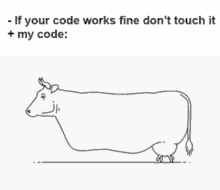